### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [7]:
# Import the necessary libraries, packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')  

# View the DataFrame.
print(reviews.shape)
reviews.head() 

(2000, 11)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [9]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [10]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [11]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [12]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform', 'review', 'summary'])

# View column names.
print(reviews.shape)
reviews.head() 

(2000, 7)


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


## 3. Rename columns

In [13]:
# Rename the column headers.
reviews.rename(columns = {'remuneration (k£)':'remuneration', 'spending_score (1-100)':'spending_score'}, inplace = True)

# View column names.
list(reviews)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product']

## 4. Save the DataFrame as a CSV file

In [14]:
# Create a CSV file as output.
reviews.to_csv('reviews_clean.csv', index=False)

In [15]:
# Import new CSV file with Pandas.
reviews_clean = pd.read_csv('reviews_clean.csv')  

# View DataFrame.
print(reviews_clean.shape)
reviews_clean.head() 

(2000, 7)


,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


# Specify the variables and split the data into training and testing sets

In [16]:
# Split data into predictor variables (X) and outcome variable (y)
X = reviews_clean[['spending_score', 'remuneration', 'age']]
y = reviews_clean['loyalty_points']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Simple Linear Regression

### Spending Score vs. Loyalty Points

In [17]:
# Define variables
spending_score = X_train['spending_score']
loyalty_points = y_train

# Calculate the correlation coefficient
corr_coef = np.corrcoef(spending_score, loyalty_points)[0, 1]

# Print the correlation coefficient
print('Correlation coefficient between spending score and loyalty points:', corr_coef)


Correlation coefficient between spending score and loyalty points: 0.6694853417269788


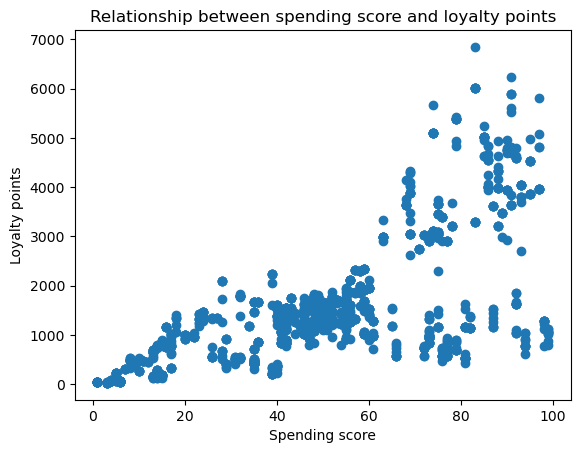

In [18]:
# Visualize the data
plt.scatter(spending_score, loyalty_points)
plt.xlabel('Spending score')
plt.ylabel('Loyalty points')
plt.title('Relationship between spending score and loyalty points')
plt.show()

In [19]:
# Add constant term to predictor variables
X_train = sm.add_constant(X_train)

# Fit OLS regression model
model_1 = sm.OLS(y_train, X_train[['const', 'spending_score']]).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1136.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          1.01e-182
Time:                        12:14:45   Log-Likelihood:                -11595.
No. Observations:                1400   AIC:                         2.319e+04
Df Residuals:                    1398   BIC:                         2.320e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -84.0022     55.741     -1.

#### Diagnostics

1. <b>Resdiual Standard Error</b>: The coefficient of the predictor variable spending_score is 33.0937, and is significant (p < 0.05). The coefficient for X (33.0937) indicates that for every one-unit increase in x, the predicted value of y will increase by 33.0937 units.

2. <b>𝑅2</b>: 44.8% of the total variability of y (loyalty points), is explained by the variability of X (spending score).

The coefficients in the table show the estimated regression equation: y = -84.0022 + 33.0937X. The intercept term (-84.0022) represents the predicted value of y when X = 0. 



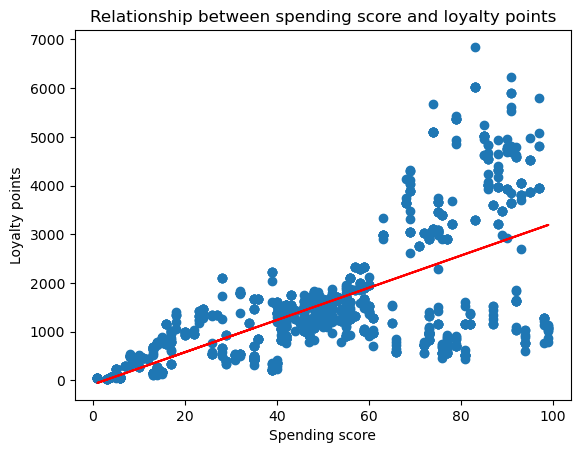

In [20]:
# Plot regression line on scatter plot
plt.scatter(X_train['spending_score'], y_train)
plt.plot(X_train['spending_score'], model_1.predict(X_train[['const', 'spending_score']]), color='red')
plt.xlabel('Spending score')
plt.ylabel('Loyalty points')
plt.title('Relationship between spending score and loyalty points')
plt.show()

### Remuneration vs. Loyalty Points

In [21]:
# Calculate correlation coefficient between remuneration and loyalty_points
corr_coef = np.corrcoef(X_test['remuneration'], y_test)[0,1]
print('Correlation coefficient:', corr_coef)

Correlation coefficient: 0.5746933559041453


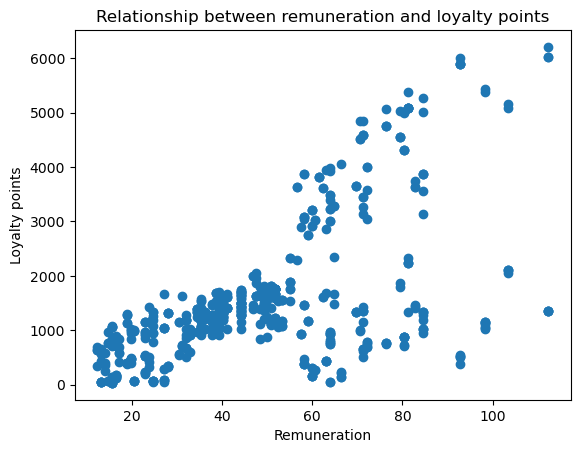

In [22]:
# Visualize relationship between remuneration and loyalty_points
plt.scatter(X_test['remuneration'], y_test)
plt.xlabel('Remuneration')
plt.ylabel('Loyalty points')
plt.title('Relationship between remuneration and loyalty points')
plt.show()

In [23]:
# Add constant term to predictor variables
X_test = sm.add_constant(X_test)

# Fit OLS regression model
model_2 = sm.OLS(y_test, X_test[['const', 'remuneration']]).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     294.9
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           4.97e-54
Time:                        12:14:49   Log-Likelihood:                -5020.4
No. Observations:                 600   AIC:                         1.004e+04
Df Residuals:                     598   BIC:                         1.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.6880     99.279      0.218   

#### Diagnostics

1. <b>Resdiual Standard Error</b>: The coefficient of the predictor variable spending_score is 31.4188, and is significant (p < 0.05). The coefficient indicates that for every one-unit increase in x, the predicted value of y will increase by 31.4188 units.

2. <b>𝑅2</b>: 33% of the total variability of y (loyalty points), is explained by the variability of X (remuneration).

The coefficients in the table show the estimated regression equation: y = 21.6880 + 31.4188. The intercept term (21.6880) represents the predicted value of y when X = 0. 


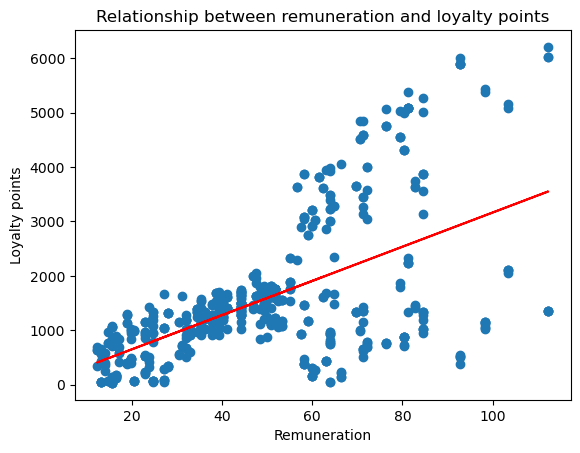

In [24]:
# Plot regression line on scatter plot
plt.scatter(X_test['remuneration'], y_test)
plt.plot(X_test['remuneration'], model_2.predict(X_test[['const', 'remuneration']]), color='red')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty points')
plt.title('Relationship between remuneration and loyalty points')
plt.show()

### Age vs. Loyalty Points

In [25]:
# Calculate correlation coefficient between age and loyalty_points
corr_coef = np.corrcoef(X_test['age'], y_test)[0,1]
print('Correlation coefficient:', corr_coef)

Correlation coefficient: -0.05103180968161231


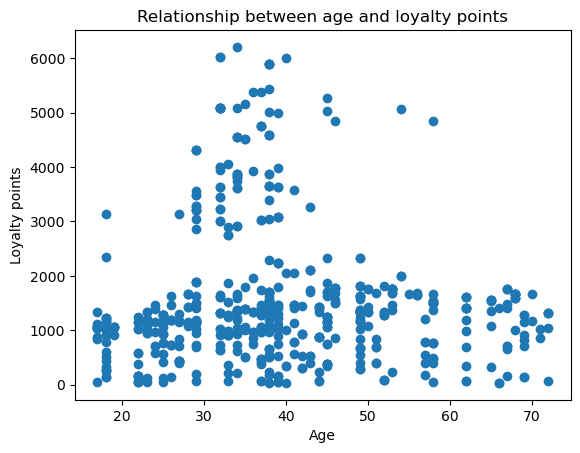

In [26]:
# Visualize relationship between age and loyalty_points
plt.scatter(X_test['age'], y_test)
plt.xlabel('Age')
plt.ylabel('Loyalty points')
plt.title('Relationship between age and loyalty points')
plt.show()

In [27]:
# Add constant term to predictor variables
X_test = sm.add_constant(X_test)

# Fit OLS regression model
model_3 = sm.OLS(y_test, X_test[['const', 'age']]).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.561
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.212
Time:                        12:14:53   Log-Likelihood:                -5139.9
No. Observations:                 600   AIC:                         1.028e+04
Df Residuals:                     598   BIC:                         1.029e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1752.6940    161.446     10.856      0.0

#### Diagnostics

1. <b>Resdiual Standard Error</b>: The coefficient of the predictor variable spending_score is -4.8564, but is not significant (p > 0.05).

2. <b>𝑅2</b>: 0.3% of the total variability of y (loyalty points), is explained by the variability of X (age).

The coefficients in the table show the estimated regression equation: y = 1752.6940 - 4.8563. The intercept term (1752.6940) represents the predicted value of y when X = 0. 


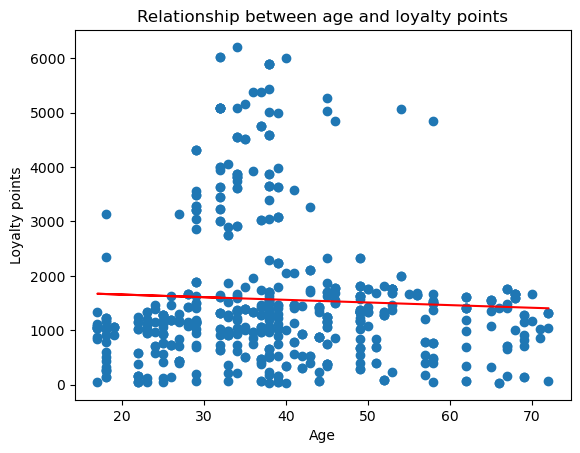

In [28]:
# Plot regression line on scatter plot
plt.scatter(X_test['age'], y_test)
plt.plot(X_test['age'], model_3.predict(X_test[['const', 'age']]), color='red')
plt.xlabel('Age')
plt.ylabel('Loyalty points')
plt.title('Relationship between age and loyalty points')
plt.show()

## 5. Multiple Linear regression

In [36]:
# Calculate correlation coefficients between predictors and outcome
corr_coef_1 = np.corrcoef(X_test['spending_score'], y_test)[0,1]
corr_coef_2 = np.corrcoef(X_test['remuneration'], y_test)[0,1]
corr_coef_3 = np.corrcoef(X_test['age'], y_test)[0,1]
print('Correlation coefficient (spending score):', corr_coef_1)
print('Correlation coefficient (remuneration):', corr_coef_2)
print('Correlation coefficient (age):', corr_coef_3) 

Correlation coefficient (spending score): 0.6791011458516053
Correlation coefficient (remuneration): 0.5746933559041453
Correlation coefficient (age): -0.05103180968161231


In [37]:
# Add constant term to predictor variables
X_test = sm.add_constant(X_test)

# Fit OLS regression model with all three predictors
model_4 = sm.OLS(y_test, X_test[['const', 'spending_score', 'remuneration', 'age']]).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     982.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          3.33e-230
Time:                        12:16:07   Log-Likelihood:                -4605.9
No. Observations:                 600   AIC:                             9220.
Df Residuals:                     596   BIC:                             9237.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2231.6374     99.086    -22.

#### Diagnostics

1. <b>Resdiual Standard Error</b>: The coefficient of the predictor variable spending_score is -4.8564, but is not significant (p > 0.05).

2. <b>𝑅2</b>: 0.3% of the total variability of y (loyalty points), is explained by the variability of X (age).

The coefficients in the table show the estimated regression equation: y = 1752.6940 - 4.8563. The intercept term (1752.6940) represents the predicted value of y when X = 0. 


In [38]:
# Calculate predicted values using the fitted model
y_pred = model_4.predict(X_test[['const', 'spending_score', 'remuneration', 'age']])

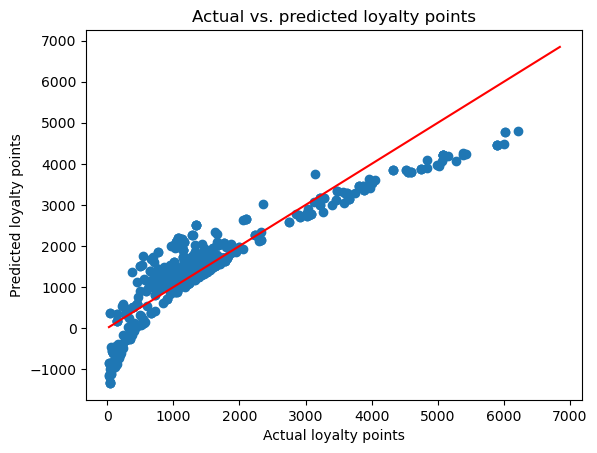

In [39]:
# Visualize predicted vs. actual values using a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual loyalty points')
plt.ylabel('Predicted loyalty points')
plt.title('Actual vs. predicted loyalty points')

# Add a line
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')


plt.show()

## Check assumptions

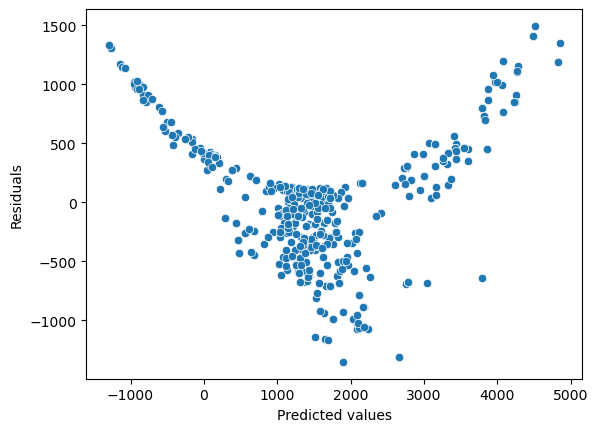

In [32]:
# 1. Check for linearity in the relationship between the independent variables and the dependent variable.

# Fit multiple linear regression model on the training data
model = ols('loyalty_points ~ spending_score + remuneration + age', data=X_train.join(y_train)).fit()

# Predict values for the test data using the multiple linear regression model
y_pred = model.predict(X_test)

# Check linearity assumption with scatter plot of residuals vs. predicted values
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()


A U-shaped curve in a plot of the dependent variable against an independent variable suggests a non-linear relationship between the variables. In other words, the effect of the independent variable on the dependent variable may not be constant across the range of the independent variable.

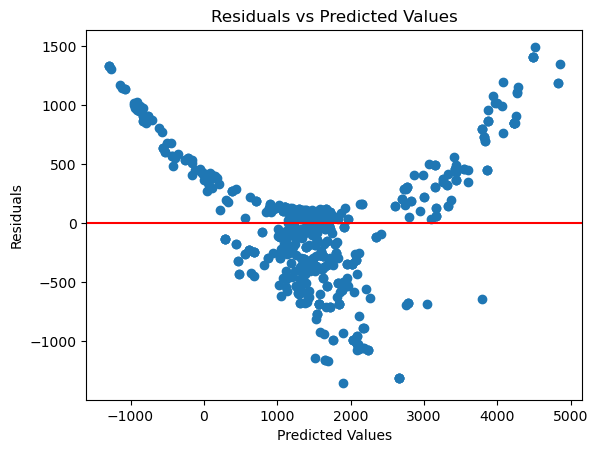

In [33]:
# 2. Check for homoscedasticity
# The variance of the errors should be constant for all levels of the independent variables. 
# Plot the residuals against the predicted values. 
# If there is a clear pattern or trend, it may indicate heteroscedasticity.

y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

A U-shaped curve in the residuals plot indicates that the variance of the errors is not constant across the range of the independent variable, which violates the assumption of homoscedasticity. In other words, the errors have a different variance for different values of the independent variable. This can lead to biased and inefficient estimates of the regression coefficients and standard errors, and can affect the validity of the hypothesis tests and confidence intervals.

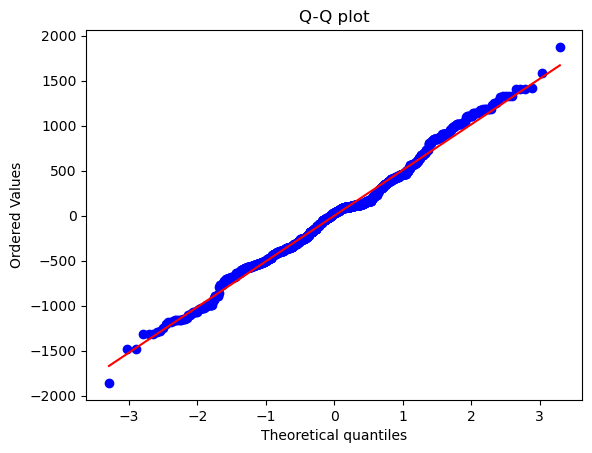

In [34]:
# 3. Check for normality: The residuals should be normally distributed. 
# This assumption can be checked by creating a histogram or Q-Q plot of the residuals.

# import the necessary libraries
import scipy.stats as stats

# Plot a Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Q-Q plot")
plt.show()

In this case, the points on the Q-Q plot should fall approximately along a straight line, suggesting that the residuals are normally distributed. 

In [ ]:
# 4. Check for independence with the Durbin-Watson statistic

The Durbin-Watson statistic measures the degree of autocorrelation in the residuals of the regression model. The statistic ranges from 0 to 4, with values closer to 0 indicating positive autocorrelation and values closer to 4 indicating negative autocorrelation. A value of 2 indicates no autocorrelation.

In this case, the Durbin-Watson = 2.008. This value is close to 2, which suggests that there is no significant autocorrelation in the residuals, and hence, the assumption of independence is met.

In [35]:
# 5. Check for multicollinearity using the Variance Inflation Factor (VIF)

# Add a constant.
x_temp = sm.add_constant(X_train)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor        features
0       20.52           const
1        1.06  spending_score
2        1.00    remuneration
3        1.06             age


## 6. Observations and insights

<b>Multiple Linear Regression</b>
- The dependent and independent variables were specified. 
- The data was split into training and testing sets
- The OLS model was fitted to the training data, containing 1400 observations.
- The results of the multiple linear regression analysis are summarised in the OLS table, which gives the best approximate of the true population regression line.
-  Some of the key items for consideration include:
    - R-squared = 0.844. This indicates that 84.4% of the variance in loyalty points can explained by spending score, remuneration and age. 
    - Coef: Estimated coefficients for the intercept and each independent variable. 
    - std err: The standard error of each estimated coefficient, which is a measure of how much the coefficient estimate is likely to vary if the analysis were repeated on another sample.
    - t: The t-value of each estimated coefficient, which is the estimated coefficient divided by its standard error. 
    - P>|t|: The p-value of each estimated coefficient, which indicates the level of statistical significance of the estimated coefficient. In this case, all coefficients are statistically significant, as the p-value is less than 0.05.

In this case, the null hypothesis is rejected: age, remuneration and spending score each have a significant positive relationship with loyalty points. Since the coefficients of the variables are also positive, this suggests that as the values of the independent variables increase, the value of the dependent variable also increases.
As a final step, the testing data was used to evaluate the performance of the model, using the same metrics that were used during the training phase. The Mean Squared Error (MSE) and R-Squared were calculated, and compared with the those from the training phase to determine if the model is overfitting or generalizing well to the new data. 

In this case, MSE = 275278.88. This high value suggests that the model may not be accurately predicting loyalty points based on the given predictors (i.e. there could be other factors that affect loyalty points beyond the predictors in this model). 

R-squared = 0.830, suggesting that the model explains 83% of the variance in the loyalty points. 


<b>Assumptions</b>
1. The relationship between variables is not linear.
2. Homoscedsticity is present.
3. The results are normally distirbuted.
4. The assumptions of independence are met. 
5. The variance inflation factor (VIF) is a measure of how much the variance of the estimated regression coefficient is increased due to collinearity with the other independent variables in the model. Generally, a VIF value of less than 5 indicates low collinearity, while values above 10 may indicate high collinearity. In this case, all of the VIF values are below 5, indicating that there is low collinearity among the independent variables in the model.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [36]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [37]:
# Load the CSV file(s) as df2.
# Import the data into Python.
df2 = pd.read_csv('reviews_clean.csv')

# View DataFrame.
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB
None


,gender,age,remuneration,spending_score,loyalty_points,education,product
0,Male,18,12.30,39,210,graduate,453
1,Male,23,12.30,81,524,graduate,466
2,Female,22,13.12,6,40,graduate,254
3,Female,25,13.12,77,562,graduate,263
4,Female,33,13.94,40,366,graduate,291


In [38]:
# Drop unnecessary columns.

df3 = df2.drop(columns=['product', 'age', 'gender', 'loyalty_points', 'education'])

# View DataFrame.
df3.head()


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40


In [39]:
# Explore the data.
df3.info

<bound method DataFrame.info of       remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]>

In [40]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

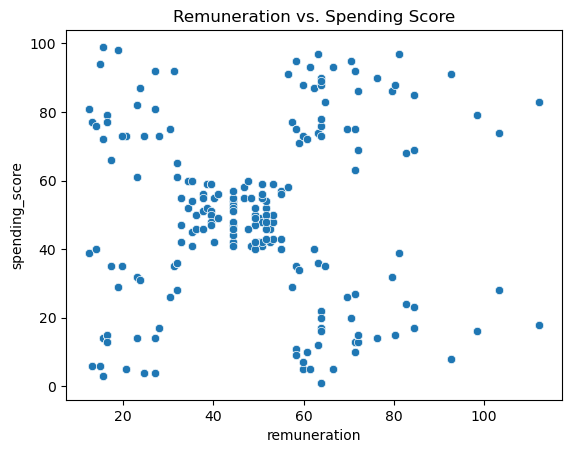

In [41]:
# Create a scatterplot with Seaborn

# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
                y='spending_score',
                data=df3)

# set the title for the plot
plt.title("Remuneration vs. Spending Score")

# display the plot
plt.show()

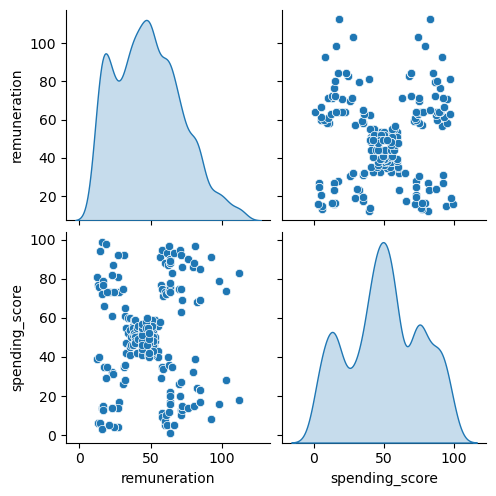

In [42]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]

sns.pairplot(df3,
             vars=x,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

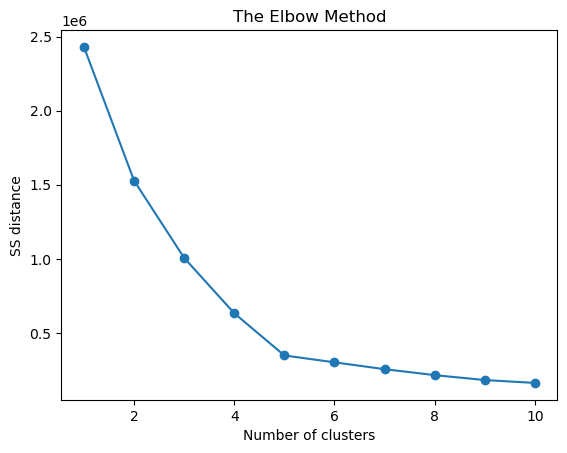

In [43]:
# Determine the number of clusters: Elbow method.

# Import the KMeans class.
from sklearn.cluster import KMeans


# Elbow chart to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

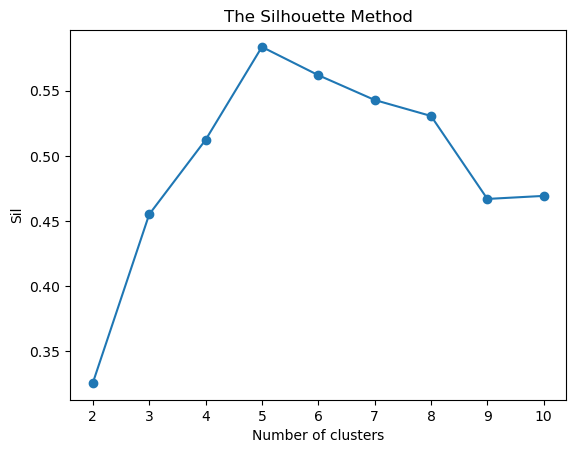

In [44]:
# Determine the number of clusters: Silhouette method.

# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

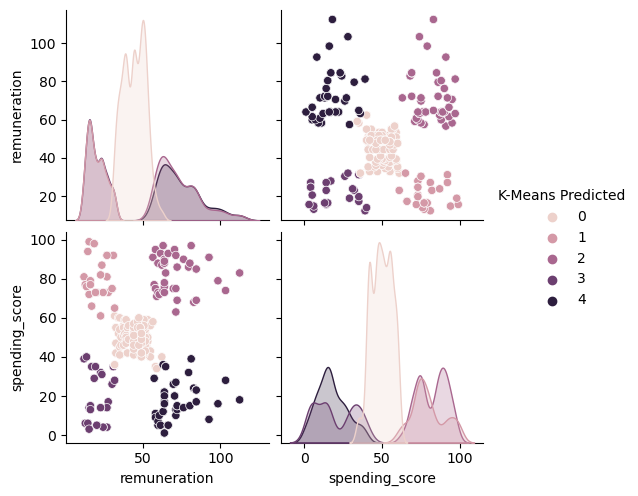

In [45]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

## 5. Fit final model and justify your choice

In [46]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [47]:
# View the K-Means predicted.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


## 6. Plot and interpret the clusters

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

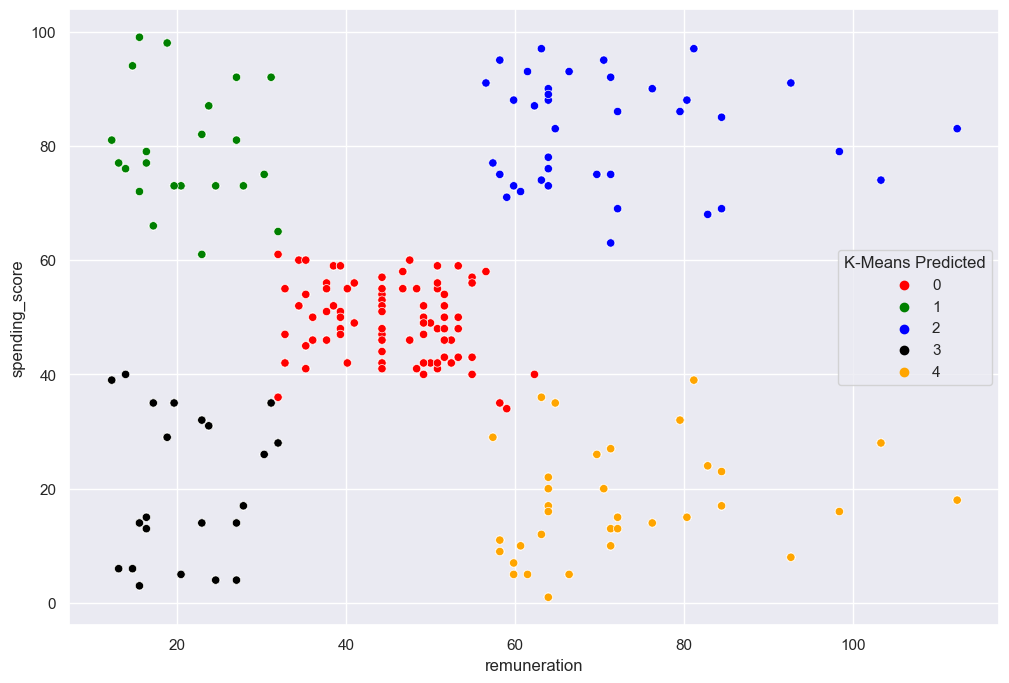

In [48]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# View the DataFrame.


## 7. Discuss: Insights and observations

***Your observations here...***

The results of the K-means clustering analysis for Turtle Games (TG) identified five distinct customer segments based on remuneration and spending scores. These insights can be leveraged to tailor marketing strategies and better target specific groups within the customer base.

- The largest segment (n=774) comprises customers with moderate spending scores and remuneration levels. TG can focus on maintaining customer loyalty and upselling opportunities for this group.
- The second segment (n=356) includes customers with high remuneration and high spending scores. TG should prioritize retaining these high-value customers and maximizing their lifetime value.
- The third segment (n=330) consists of high remuneration customers with low spending scores. TG can target this group with incentives and promotions to boost their spending levels.
- The fourth segment (n=271) has customers with low remuneration and low spending scores. TG can explore cost-effective engagement strategies to improve customer retention and spending in this group.
- The smallest segment (n=269) captures customers with low remuneration but high spending scores. TG should focus on understanding the spending drivers for this group and attempt to replicate success factors for other customer segments.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

#nltk.download ('punkt').
#nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set as df4.

df4=pd.read_csv('turtle_reviews2.csv')

# View DataFrame.
df4

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [3]:
# Explore data set.
print(df4.info())
df4.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [52]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df4.drop(columns=['gender', 'age', 'remuneration','spending_score', 'loyalty_points', 'education', 'language'\
                      ,'platform', 'product'])

# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [53]:
# Determine if there are any missing values.
df4.isna()

# Determine the number of rows where the comments are not populated
df4.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [54]:
# Review: Change all to lower case and join with a space.

# Transform data to lowercase.
df4['review'] = df4['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [55]:
# Summary: Change all to lower case and join with a space.

# Transform data to lowercase.
df4['summary'] = df4['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [56]:
# Replace all the punctuations in review column.
df4['review'] = df4['review'].str.replace('[^\w\s]','')

# View output.
df4['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [57]:
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].str.replace('[^\w\s]','')

# View output.
df4['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [58]:
# Drop duplicates in both columns.
deduped = df4.drop_duplicates(subset=['review', 'summary'])

# View the datafram
deduped.reset_index(inplace=True)
print(deduped.shape)
deduped

(1961, 3)


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


## 3. Tokenise and create wordclouds

In [59]:
# Create new DataFrame (copy DataFrame).
deduped2 = deduped
# View DataFrame.
deduped2

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [60]:
# Import nltk and download nltk's resources to assist with tokenisation.
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASARUB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [61]:
# Apply tokenisation to both columns.

# Tokenise the words in review
deduped2['tokens_review'] = deduped2['review'].apply(word_tokenize)

# Preview data.
deduped2['tokens_review'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object

In [62]:
# Tokenize the words in summary
deduped2['tokens_summary'] = deduped2['summary'].apply(word_tokenize)

# Preview data.
deduped2['tokens_summary'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object

### Removing non-alphanumeric and stopwords & creating a word cloud: review column

In [63]:
# For review, define an empty list of tokens

all_tokens_review = []

for i in range(deduped2['tokens_review'].shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + deduped2['tokens_review'][i]

In [64]:
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_review)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [65]:
# Filter out tokens that are not alphanumeric (to eliminate punctuation marks, etc.).
tokens_review = [word for word in all_tokens_review if word.isalnum()]

In [76]:
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_review2 = [x for x in tokens_review if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_review2_string = ''

for value in tokens_review2:
    # Add each filtered token word to the string.
    tokens_review2_string = tokens_review2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASARUB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


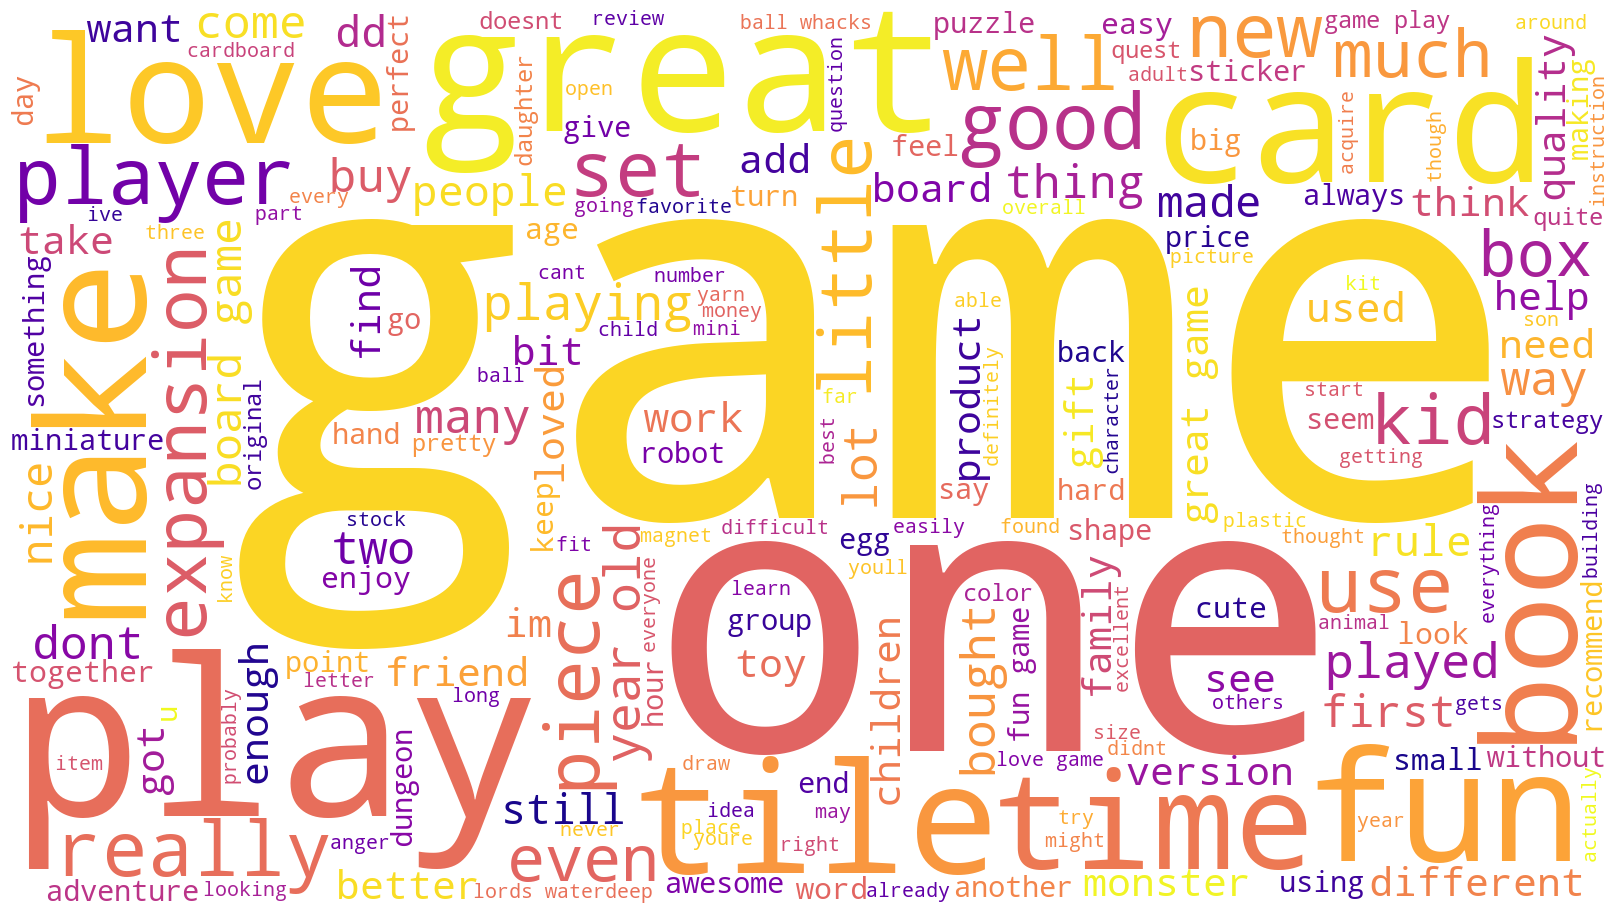

In [77]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_review2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### Removing non-alphanumeric and stopwords & creating a word cloud: summary column

In [72]:
# For summary, define an empty list of tokens

all_tokens_summary = []

for i in range(deduped2['tokens_summary'].shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + deduped2['tokens_summary'][i]

In [73]:
# Calculate the frequency distribution.
fdist = FreqDist(all_tokens_summary)

# Preview data.
fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

In [74]:
# Filter out tokens that are not alphanumeric (to eliminate punctuation marks, etc.).
tokens_summary = [word for word in all_tokens_summary if word.isalnum()]

In [78]:
# Create a filtered list of tokens without stopwords.
tokens_summary2 = [x for x in tokens_summary if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_summary2_string = ''

for value in tokens_summary2:
    # Add each filtered token word to the string.
    tokens_summary2_string = tokens_summary2_string + value + ' '

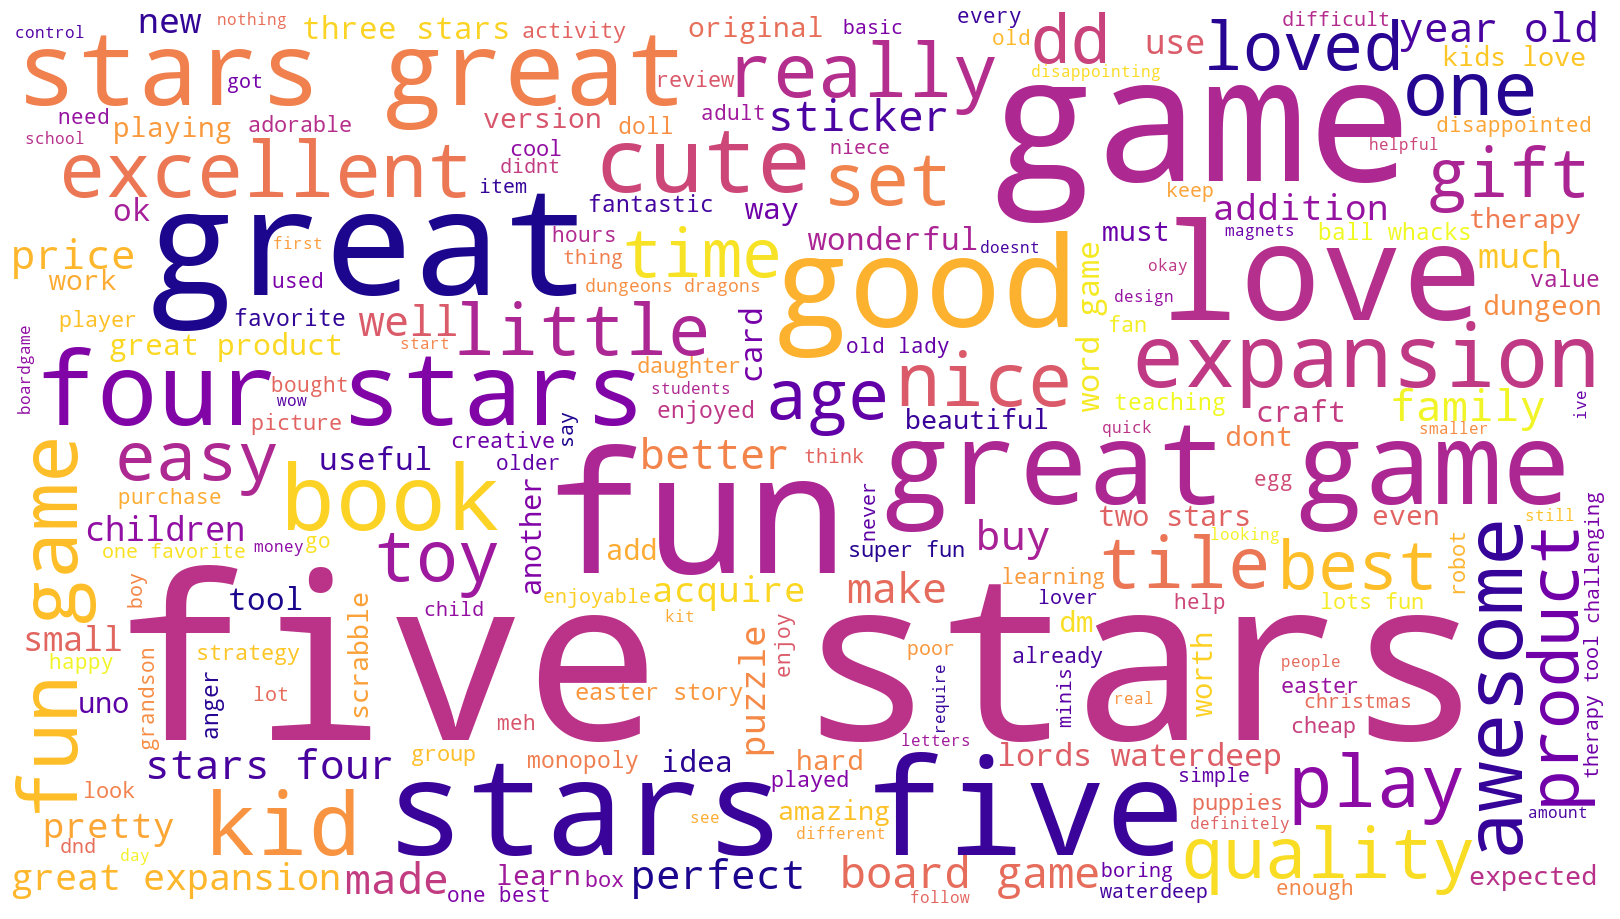

In [79]:
# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_summary2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Common words

In [80]:
# Determine the 15 most common words in the review column

# View the frequency distribution
fdist1_review = FreqDist(tokens_review2)
# Preview the data.
fdist1_review

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [81]:
# Determine the 15 most common words in the summary column

# View the frequency distribution
fdist1_summary = FreqDist(tokens_summary2)
# Preview the data.
fdist1_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [82]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter for the review column.
counts_review = pd.DataFrame(Counter(tokens_review2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


In [83]:
# Generate a DataFrame from Counter for the sumary column.
counts_summary = pd.DataFrame(Counter(tokens_summary2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

### 5.1 Polarity

In [84]:
# Define a function to extract a polarity score for each comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [85]:
# Determine polarity of both columns. 

# Populate a new column with polarity scores for review column.
deduped2['polarity_review'] = deduped2['review'].apply(generate_polarity)

# View output.
deduped2['polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64

In [86]:
# Populate a new column with polarity scores for summary column.
deduped2['polarity_summary'] = deduped2['summary'].apply(generate_polarity)

# View output.
deduped2['polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

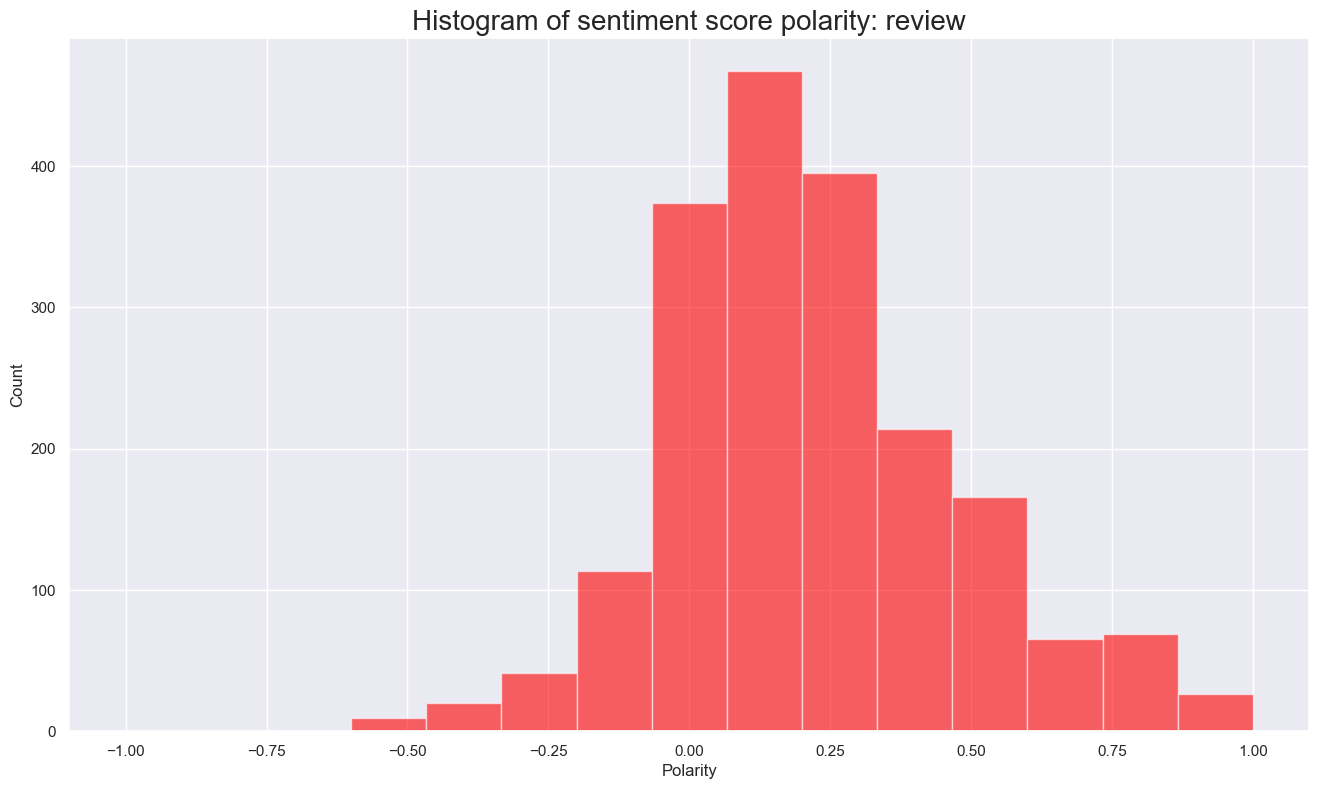

In [87]:
# Review: Create a histogram plot with bins = 15.

# Set the number of bins
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(deduped2['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity: review', fontsize=20)

plt.show()

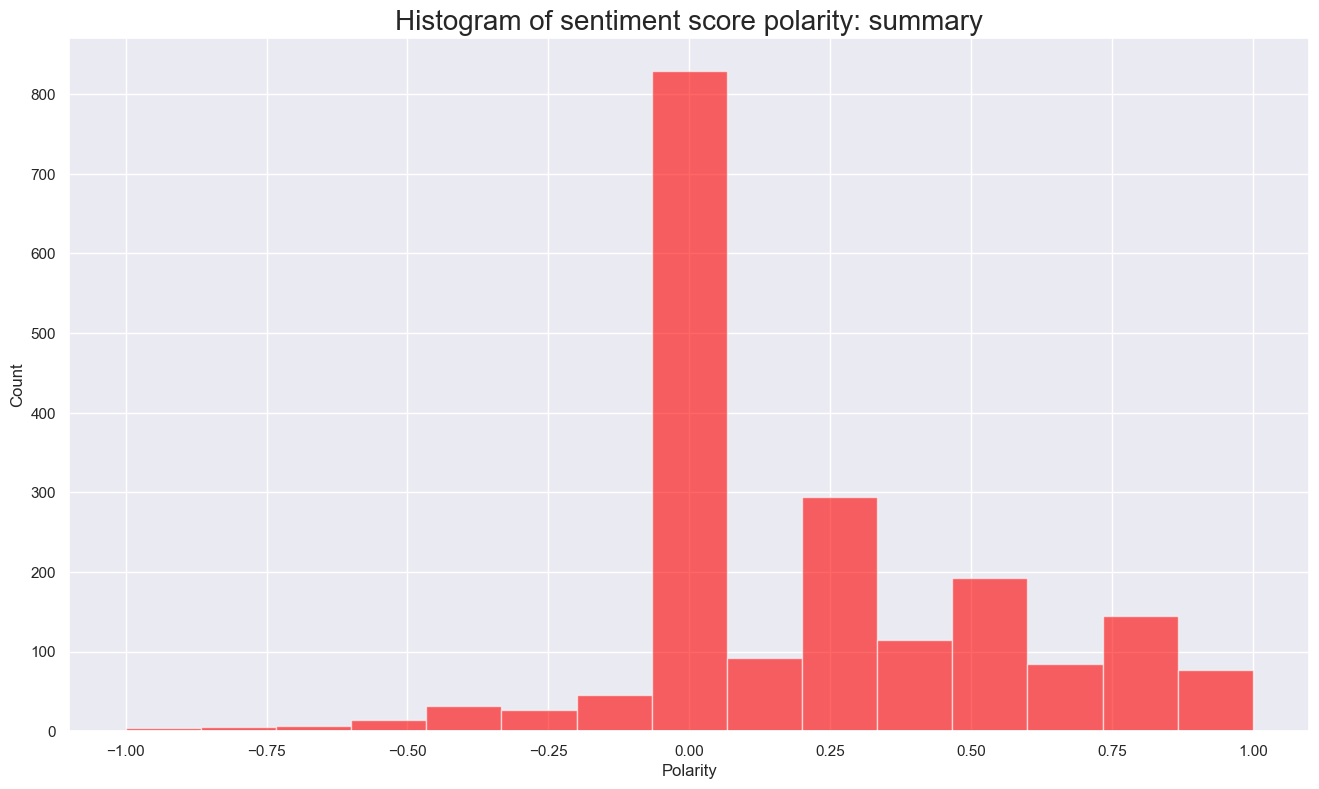

In [88]:
# Summary: Create a histogram plot with bins = 15.

# Set the number of bins
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(deduped2['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity: summary', fontsize=20)

plt.show()

<b>Note:</b> These plots shows that most comments sit closest to neutral, but are both skewed to the right, for items expressing a positive sentiment.

## 5.2 Subjectivity

In [89]:
# Define a function to extract a polarity score for each comment.
def generate_subjectivity(comment):
    '''Extract subjectivity score (0 to 1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [90]:
# Calculate subjectivtiy score for each review

deduped2['subjectivity_review'] = deduped2['review'].apply(generate_subjectivity)

# Preview the results
deduped2['subjectivity_review'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64

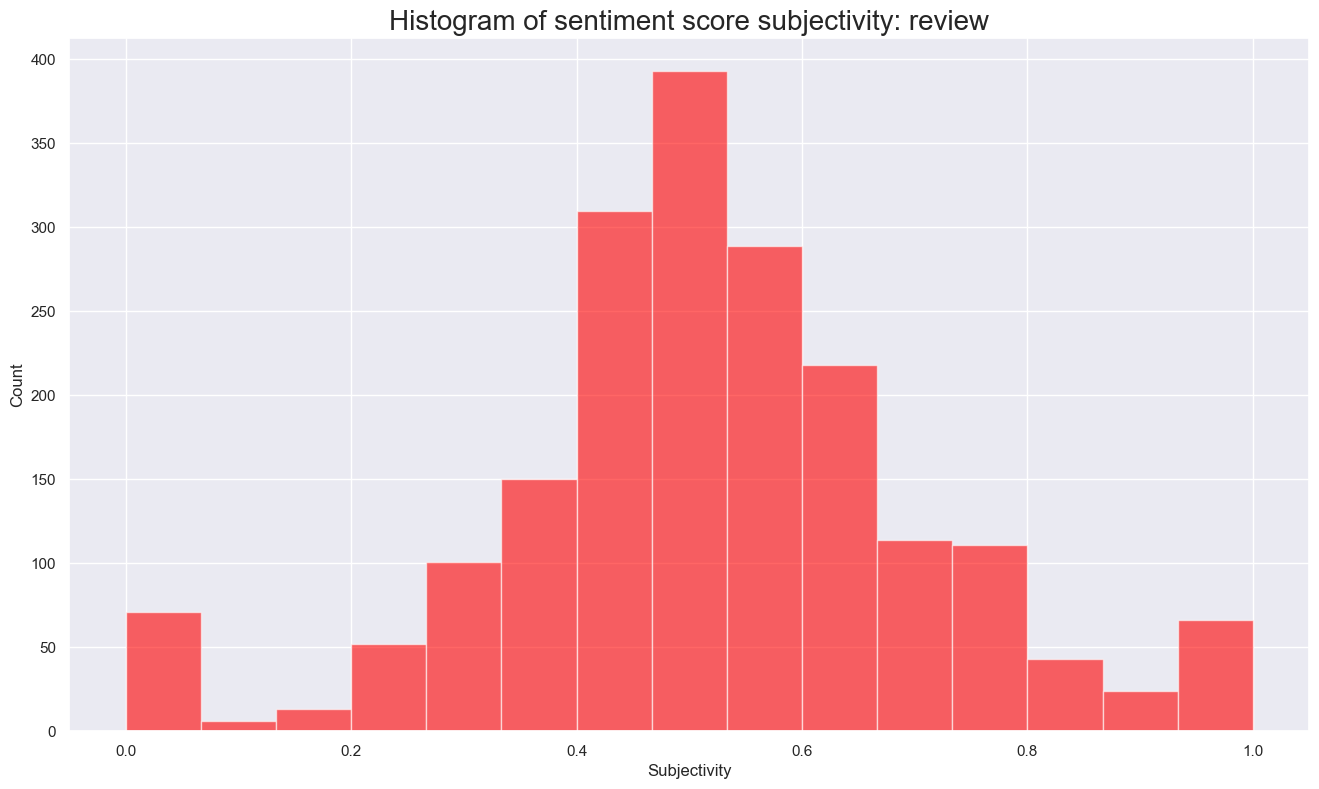

In [91]:
# Review: Create a histogram plot with bins = 15.

# Set the number of bins
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(deduped2['subjectivity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity: review', fontsize=20)

plt.show()

In [92]:
# Calculate subjectivtiy score for each summary

deduped2['subjectivity_summary'] = deduped2['summary'].apply(generate_subjectivity)

# Preview the results
deduped2['subjectivity_summary'].head()

0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

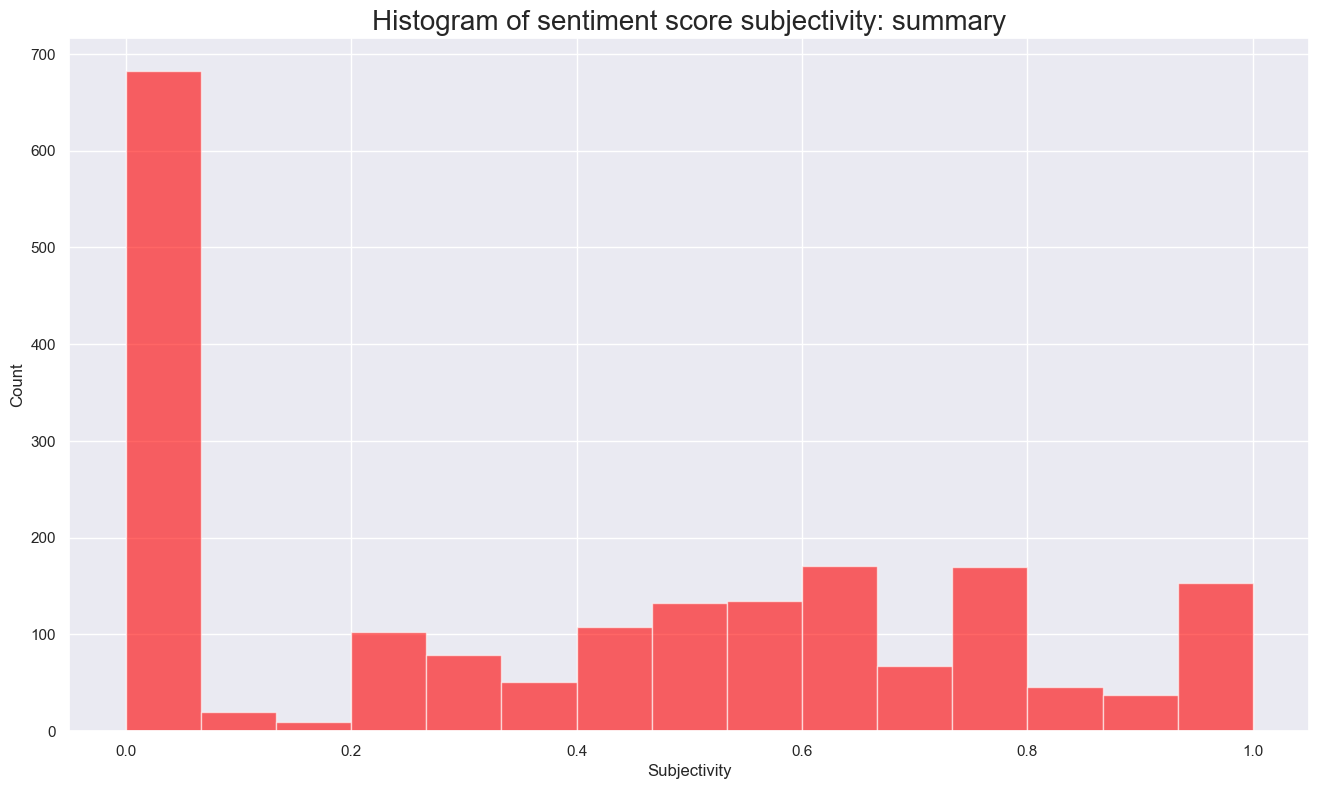

In [93]:
# Summary: Create a histogram plot with bins = 15.

# Set the number of bins
num_bins = 15

# Set the plot area
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(deduped2['subjectivity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score subjectivity: summary', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [94]:
# Top 20 negative reviews.

# Create a DataFrame.
negative_sentiment_reviews = deduped2.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_reviews = negative_sentiment_reviews[['review', 'polarity_review']]

# Adjust the column width and view the output.
negative_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity_review
207,booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring and to be frank juvenile,-0.583333
362,one of my staff will be using this game soon so i dont know how well it works as yet but after looking at the cards i believe it will be helpful in getting a conversation started regarding anger and what to do to control it,-0.550000
116,i bought this as a christmas gift for my grandson its a sticker book so how can i go wrong with this gift,-0.500000
226,this was a gift for my daughter i found it difficult to use,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [95]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment_summaries = deduped2.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summaries = negative_sentiment_summaries[['summary', 'polarity_summary']]

# Adjust the column width and view the output.
negative_sentiment_summaries.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,polarity_summary
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign dealing with towns because it,-0.900000
1,another worthless dungeon masters screen from galeforce9,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming methods,-0.700000


In [96]:
# Top 20 positive reviews.

# Create a DataFrame.
positive_sentiment_reviews = deduped2.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_reviews = positive_sentiment_reviews[['review', 'polarity_review']]

# Adjust the column width and view the output.
positive_sentiment_reviews.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,polarity_review
7,came in perfect condition,1.000000
164,awesome book,1.000000
193,awesome gift,1.000000
489,excellent activity for teaching selfmanagement skills,1.000000
517,perfect just what i ordered,1.000000
583,wonderful product,1.000000
601,delightful product,1.000000
613,wonderful for my grandson to learn the resurrection story,1.000000
782,perfect,1.000000
923,awesome,1.000000


In [97]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_sentiment_summary = deduped2.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'polarity_summary']]

# Adjust the column width and view the output.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,polarity_summary
6,best gm screen ever,1.000000
28,wonderful designs,1.000000
32,perfect,1.000000
80,theyre the perfect size to keep in the car or a diaper,1.000000
133,perfect for preschooler,1.000000
139,awesome sticker activity for the price,1.000000
160,awesome book,1.000000
162,he was very happy with his gift,1.000000
186,awesome,1.000000
209,awesome and welldesigned for 9 year olds,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

TG’s marketing department sought to identify the 15 most common words used in online product reviews, as well as a list of the top 20 positive and negative reviews received from the website. These reviews will be used to steer the marketing department on how to approach future campaigns. NLP was applied to the data provided, which comprised of two columns: reviews and summary. The Natural Language Toolkit (nltk) library was used to analyse the data. First, the data was cleaned by converting all words to lowercase, removing punctuation and stopwords such as ‘the’ or ‘and’. Tokenization – a process of breaking the text down into smaller units was performed. Word clouds for each column (Reviews and summary) were created to visualize some oft eh most frequently occurring words. S frequency distribution as used to identify the most common words used. In the reviews column, the 15 most frequently used words, in order of frequency were as follows: game, great, fun, one, play, like, love, really, get, cards, tiles, time, good, would and book. For the summary column, the most frequently used words were stars, five, game, great, fun, love, good, four, like, expansion, kids, cute, book, one and awesome. 

Next, polarity (positive or negative sentiment) were reviewed using the TextBlob function. Polarity scores range from -1 to 1, where -1 is negative and + 1 is positive. Histograms were plotted for both columns to see the distribution of polarity in each column. The review column shows a distribution that that is slightly skewed to the left for items expressing a positive sentiment. The summary column is mostly neutral, with a smaller left-skew towards positive comments and a longer negative tail than the reviews column. 

Next, subjectivity for each column was assessed using TextBlob, and plotted on histograms. The subjectivity score ranges from 0 to 1, where 0 is a completely objective statement and 1 represents a highly subjective statement.  The review column shows a normal distribution, meaning that most reviews contain a mic or subjective and objective information. The smaller peaks at subjectivity = 0 and 1 suggest that some reviews are either entirely subjective or objective. The summary histogram is skewed to the right, meaning that most of the comments in the summary column are objective. 

Finally, the top 20 positive and negative reviews and summaries were identified, based on their polarity scores. 


# 